### CNN-based 3D Skeleton Tennis Shot Recognition

Based on method from paper ['Skeleton-based Action Recognition with Convolutional Neural Networks'](https://arxiv.org/abs/1704.07595) by Li et al. (2017).

We use the 3D skeletal animation data from the ['THETIS'](http://thetis.image.ece.ntua.gr/) dataset for training. Each animation is represented as a `T x N` 3-channel image where `T` is the number of frames of the animation, `N` is the number of skeletal joints, and the 3 colour channels represent the `x, y, z` coordinates of the joints.

Pre-process training videos into skeleton images

In [1]:
# COMP0016-Team1-Prithvi Kohli

from pose_extraction import extract_pose_frames, PoseNotFoundError
from os import listdir, mkdir
from os.path import isfile, isdir, join
import cv2
import numpy as np

root_dir = "training_data/VIDEO_RGB"

def process_shot_dirs(shot_dirs, out_dir):
    if not isdir(out_dir):
        mkdir(out_dir)
    for s in shot_dirs:
        src_path = join(root_dir, s)
        videos = [f for f in listdir(src_path) if isfile(join(src_path, f))]
        for v in videos:
            cap = cv2.VideoCapture(join(src_path,v))
            frames = []
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                frames.append(frame)
            cap.release()
            try:
                pose_frames, _ = extract_pose_frames(frames)
            except PoseNotFoundError:
                continue

            skeleton_img = pose_frames / np.abs(pose_frames).max()
            skeleton_img = (skeleton_img+1)*127.5
            skeleton_img = cv2.cvtColor(np.float32(skeleton_img), cv2.COLOR_RGB2BGR)
            
            cv2.imwrite(join(out_dir, f"{v[:-4]}.png"), skeleton_img)
            print(v)

backhand_dirs = ["backhand", "backhand_slice", "backhand_volley", "backhand2hands"]
forehand_dirs = ["forehand_flat", "forehand_openstands", "forehand_slice", "forehand_volley"]
service_dirs = ["flat_service", "kick_service", "slice_service"]
smash_dirs = ["smash"]

process_shot_dirs(backhand_dirs, "training_data/skeleton_images/backhand")
process_shot_dirs(forehand_dirs, "training_data/skeleton_images/forehand")
process_shot_dirs(service_dirs, "training_data/skeleton_images/service")
process_shot_dirs(smash_dirs, "training_data/skeleton_images/smash")

p10_backhand_s1.avi
p10_backhand_s2.avi
p10_backhand_s3.avi
p11_backhand_s1.avi
p11_backhand_s2.avi
p11_backhand_s3.avi
p12_backhand_s1.avi
p12_backhand_s2.avi
p12_backhand_s3.avi
p13_backhand_s1.avi
p13_backhand_s2.avi
p13_backhand_s3.avi
p14_backhand_s1.avi
p14_backhand_s2.avi
p14_backhand_s3.avi
p15_backhand_s1.avi
p15_backhand_s2.avi
p15_backhand_s3.avi
p16_backhand_s1.avi
p16_backhand_s2.avi
p16_backhand_s3.avi
p17_backhand_s1.avi
p17_backhand_s2.avi
p17_backhand_s3.avi
p18_backhand_s1.avi
p18_backhand_s2.avi
p18_backhand_s3.avi
p19_backhand_s1.avi
p19_backhand_s2.avi
p19_backhand_s3.avi
p1_backhand_s1.avi
p1_backhand_s2.avi
p1_backhand_s3.avi
p20_backhand_s1.avi
p20_backhand_s2.avi
p20_backhand_s3.avi
p21_backhand_s1.avi
p21_backhand_s2.avi
p21_backhand_s3.avi
p22_backhand_s1.avi
p22_backhand_s2.avi
p22_backhand_s3.avi
p23_backhand_s1.avi
p23_backhand_s2.avi
p23_backhand_s3.avi
p24_backhand_s1.avi
p24_backhand_s2.avi
p24_backhand_s3.avi
p25_backhand_s1.avi
p25_backhand_s2.avi
p25

Load the skeleton images training data.

In [1]:
import tensorflow as tf

skeleton_dir = "training_data/skeleton_images"

img_height = 100
img_width = 15
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  skeleton_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  skeleton_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


Found 1980 files belonging to 4 classes.
Using 1584 files for training.
Found 1980 files belonging to 4 classes.
Using 396 files for validation.
['backhand', 'forehand', 'service', 'smash']


Create the CNN model.

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.Rescaling(1./127.5, offset=-1, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile and train the model.

Epoch 1/50
50/50 [==============================] - 1s 20ms/step - loss: 0.9146 - accuracy: 0.6629 - val_loss: 0.6548 - val_accuracy: 0.7753
Epoch 2/50
50/50 [==============================] - 1s 17ms/step - loss: 0.4994 - accuracy: 0.8150 - val_loss: 0.4616 - val_accuracy: 0.8308
Epoch 3/50
50/50 [==============================] - 1s 16ms/step - loss: 0.3944 - accuracy: 0.8352 - val_loss: 0.4074 - val_accuracy: 0.8460
Epoch 4/50
50/50 [==============================] - 1s 18ms/step - loss: 0.3332 - accuracy: 0.8687 - val_loss: 0.3601 - val_accuracy: 0.8535
Epoch 5/50
50/50 [==============================] - 1s 16ms/step - loss: 0.2841 - accuracy: 0.8807 - val_loss: 0.3221 - val_accuracy: 0.8535
Epoch 6/50
50/50 [==============================] - 1s 18ms/step - loss: 0.2427 - accuracy: 0.9066 - val_loss: 0.2800 - val_accuracy: 0.8914
Epoch 7/50
50/50 [==============================] - 1s 17ms/step - loss: 0.2039 - accuracy: 0.9179 - val_loss: 0.2651 - val_accuracy: 0.8914
Epoch 8/50
50

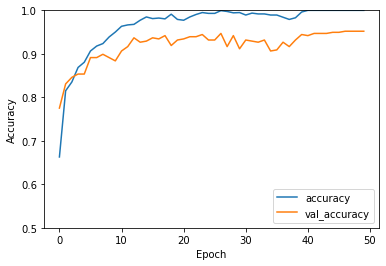

In [3]:
import matplotlib.pyplot as plt

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

model.save('cnn_recognition_model.h5')